In [1]:
# Import required library

!pip install imblearn
!pip install gradio
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency
pd.set_option('display.max_column',None)
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import pickle
import gradio as gr
import warnings
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
warnings.filterwarnings("ignore")

In [2]:


df_usedcar_train=pd.read_csv('train.csv')
df_usedcar_train.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
df_usedcar_train['Gear box type'].unique()

array(['Automatic', 'Tiptronic', 'Variator', 'Manual'], dtype=object)

In [4]:
df_usedcar_train['Mileage'] = df_usedcar_train['Mileage'].str.replace('km', '')

In [5]:
def check_turbo(engine_volume):
    if 'turbo' in engine_volume.lower():
        return 'turbo'
    else:
        return 'no turbo'

df_usedcar_train['turbo'] = df_usedcar_train['Engine volume'].apply(check_turbo)

In [6]:
#df_usedcar_test=pd.read_csv('test.csv')
#df_usedcar_test.head()

In [7]:
df_usedcar_train.drop_duplicates(subset=['ID'])

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,turbo
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,no turbo
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,no turbo
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,no turbo
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,no turbo
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,no turbo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,turbo
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,no turbo
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,04-May,Left wheel,Grey,4,no turbo
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258,4.0,Automatic,Front,04-May,Left wheel,Black,4,no turbo


In [8]:
df_usedcar_train.replace('-', np.nan, inplace=True)

In [9]:
df_usedcar_train.isnull().sum()

ID                     0
Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
turbo                  0
dtype: int64

In [10]:
df_usedcar_train['Levy']=df_usedcar_train['Levy'].astype('float')

In [11]:
df_usedcar_train['Levy'].value_counts()

Levy
765.0     486
891.0     461
639.0     410
640.0     405
1017.0    298
         ... 
3156.0      1
2908.0      1
1279.0      1
1719.0      1
1901.0      1
Name: count, Length: 558, dtype: int64

In [12]:
df_usedcar_train['Levy'].median()

781.0

In [13]:
df_usedcar_train['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [14]:
df_usedcar_train['Doors'].replace('02-Mar', 2, inplace=True)
df_usedcar_train['Doors'].replace('04-May', 4, inplace=True)
df_usedcar_train['Doors'].replace('>5', 5, inplace=True)

In [15]:
df_usedcar_train['Doors'].unique()

array([4, 2, 5], dtype=int64)

In [16]:
mean_levy=df_usedcar_train['Levy'].median()
mean_levy

781.0

In [17]:
df_usedcar_train['Levy'].replace(np.nan, mean_levy, inplace=True)

In [18]:
df_usedcar_train.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
turbo               0
dtype: int64

In [19]:
df_usedcar_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  float64
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  int64  
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [20]:
#change datatype



In [21]:
df_usedcar_train['Mileage'] = df_usedcar_train['Mileage'].str.replace(' km', '')

In [22]:
df_usedcar_train['Mileage']= df_usedcar_train['Mileage'].astype('int')

In [23]:
df_usedcar_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  float64
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  int32  
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  int64  
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [24]:
def check_turbo(engine_volume):
    if 'turbo' in engine_volume.lower():
        return 1
    elif 'Turbo' in engine_volume.lower():
        return 1
    else:
        return 0

df_usedcar_train['turbo'] = df_usedcar_train['Engine volume'].apply(check_turbo)

In [25]:
df_usedcar_train.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,turbo
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,0
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,0
2,45774419,8467,781.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,0
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,0


In [26]:
df_usedcar_train['Engine volume'] = df_usedcar_train['Engine volume'].str.replace(' turbo', '')

In [27]:
df_usedcar_train['Engine volume'] = df_usedcar_train['Engine volume'].str.replace(' Turbo', '')

In [28]:
df_usedcar_train.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,turbo
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,0
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,0
2,45774419,8467,781.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,0
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,0


In [29]:
df_usedcar_train.describe(include='all')

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,turbo
count,1.923700e+04,1.923700e+04,19237.000000,19237,19237,19237.000000,19237,19237,19237,19237,1.923700e+04,19237.000000,19237,19237,19237.000000,19237,19237,19237.000000,19237.000000
unique,NaN,NaN,NaN,65,1590,NaN,11,2,7,70,NaN,NaN,4,3,NaN,2,16,NaN,NaN
top,NaN,NaN,NaN,HYUNDAI,Prius,NaN,Sedan,Yes,Petrol,2,NaN,NaN,Automatic,Front,NaN,Left wheel,Black,NaN,NaN
freq,NaN,NaN,NaN,3769,1083,NaN,8736,13954,10150,3916,NaN,NaN,13514,12874,NaN,17753,5033,NaN,NaN
mean,4.557654e+07,1.855593e+04,868.773353,NaN,NaN,2010.912824,NaN,NaN,NaN,NaN,1.532236e+06,4.582991,NaN,NaN,3.925872,NaN,NaN,6.582627,0.100379
std,9.365914e+05,1.905813e+05,390.040440,NaN,NaN,5.668673,NaN,NaN,NaN,NaN,4.840387e+07,1.199933,NaN,NaN,0.403399,NaN,NaN,4.320168,0.300513
min,2.074688e+07,1.000000e+00,87.000000,NaN,NaN,1939.000000,NaN,NaN,NaN,NaN,0.000000e+00,1.000000,NaN,NaN,2.000000,NaN,NaN,0.000000,0.000000
25%,4.569837e+07,5.331000e+03,730.000000,NaN,NaN,2009.000000,NaN,NaN,NaN,NaN,7.013900e+04,4.000000,NaN,NaN,4.000000,NaN,NaN,4.000000,0.000000
50%,4.577231e+07,1.317200e+04,781.000000,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,1.260000e+05,4.000000,NaN,NaN,4.000000,NaN,NaN,6.000000,0.000000
75%,4.580204e+07,2.207500e+04,917.000000,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,1.888880e+05,4.000000,NaN,NaN,4.000000,NaN,NaN,12.000000,0.000000


In [30]:
df_usedcar_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  float64
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  int32  
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  int64  
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [31]:
df_usedcar_train['Leather interior'] = df_usedcar_train['Leather interior'].str.replace('Yes', '1')
df_usedcar_train['Leather interior'] = df_usedcar_train['Leather interior'].str.replace('No', '0')

In [32]:
df_usedcar_train['Wheel'] = df_usedcar_train['Wheel'].str.replace('Right-hand drive', '1')
df_usedcar_train['Wheel'] = df_usedcar_train['Wheel'].str.replace('Left wheel', '0')

In [33]:
df_usedcar_train.replace({'Fuel type':{'Petrol':0, 'Diesel':1, 'CNG':2, 'Hybrid':3, 'Hydrogen':4, 'LPG':5, 'Plug-in Hybrid':6}}, inplace=True)

In [34]:

Color_lb= LabelEncoder().fit(df_usedcar_train['Color'])
Category_lb= LabelEncoder().fit(df_usedcar_train['Category'])
Model_lb= LabelEncoder().fit(df_usedcar_train['Model'])
Manufacturer_lb= LabelEncoder().fit(df_usedcar_train['Manufacturer'])
Gearbox_lb= LabelEncoder().fit(df_usedcar_train['Gear box type'])

df_usedcar_train['Color_num']= Color_lb.transform(df_usedcar_train['Color'])
df_usedcar_train['Category_num']= Category_lb.transform(df_usedcar_train['Category'])
df_usedcar_train['Model_num']= Model_lb.transform(df_usedcar_train['Model'])
df_usedcar_train['Manufacturer_num']= Manufacturer_lb.transform(df_usedcar_train['Manufacturer'])
df_usedcar_train['Gearbox_num']= Gearbox_lb.transform(df_usedcar_train['Gear box type'])

In [35]:
df_usedcar_train['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0', '2.2', '4.7', '1.5', '4.4', '3.0', '1.4', '3.6', '2.3',
       '5.5', '2.8', '3.2', '3.8', '4.6', '1.2', '5', '1.7', '2.9', '0.5',
       '1.9', '2.7', '4.8', '5.3', '0.4', '1.1', '2.1', '0.7', '5.4',
       '3.7', '1', '2.6', '0.8', '0.2', '5.7', '6.7', '6.2', '3.4', '6.3',
       '4.3', '4.2', '0', '4.0', '20', '0.3', '5.9', '5.6', '6', '0.6',
       '6.8', '4.5', '7.3', '0.1', '1.0', '3.1', '5.0', '6.4', '3.9',
       '0.9', '5.2', '5.8'], dtype=object)

In [36]:
df_usedcar_train['Model_num'].value_counts()

Model_num
1154    1083
1334    1079
435      938
633      922
601      542
        ... 
710        1
357        1
1527       1
950        1
1169       1
Name: count, Length: 1590, dtype: int64

In [37]:
df_usedcar_train.drop(columns=['ID','Levy','Color', 'Category','Model','Manufacturer','Gear box type'], inplace=True)

In [38]:
df_usedcar_train['Drive wheels'].unique()

array(['4x4', 'Front', 'Rear'], dtype=object)

In [39]:
df_usedcar_train.replace({'Drive wheels':{'Front':0, 'Rear':1, '4x4':2}}, inplace=True)

In [40]:
df_usedcar_train.head()

,Price,Prod. year,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Drive wheels,Doors,Wheel,Airbags,turbo,Color_num,Category_num,Model_num,Manufacturer_num,Gearbox_num
0,13328,2010,1,3,3.5,186005,6.0,2,4,0,12,0,12,4,1242,32,0
1,16621,2011,0,0,3,192000,6.0,2,4,0,8,0,1,4,658,8,2
2,8467,2006,0,0,1.3,200000,4.0,0,4,1,2,0,1,3,684,21,3
3,3607,2011,1,3,2.5,168966,4.0,2,4,0,0,0,14,4,661,16,0
4,11726,2014,1,0,1.3,91901,4.0,0,4,0,4,0,12,3,684,21,0


In [41]:


def calculate_and_sort_correlations(data, target_feature):
    """
    Calculate the correlation of the target_feature to all other features
    and sort them in ascending order.

    Parameters:
    data (pd.DataFrame): The dataset containing the features.
    target_feature (str): The feature to calculate correlations against.

    Returns:
    pd.Series: Correlations of target_feature with other features, sorted in ascending order.
    """
    # Calculate the correlation matrix
    correlation_matrix = data.corr(numeric_only=True)

    # Extract the correlations for the target feature
    correlations = correlation_matrix[target_feature]

    # Drop the target feature itself
    correlations = correlations.drop(target_feature)

    # Sort the correlations in ascending order
    sorted_correlations = correlations.sort_values(ascending=True)

    return sorted_correlations

In [42]:
df_usedcar_train['Leather interior'] = df_usedcar_train['Leather interior'].astype(int)
df_usedcar_train['Wheel'] = df_usedcar_train['Wheel'].astype(int)

In [43]:
df_usedcar_train['Engine volume'] = df_usedcar_train['Engine volume'].astype(float)

In [44]:
print(calculate_and_sort_correlations(df_usedcar_train,'Price'))

Doors              -0.033116
Category_num       -0.019721
Wheel              -0.014649
Airbags            -0.012824
Fuel type          -0.012040
Color_num          -0.010295
Manufacturer_num   -0.003886
Mileage            -0.001758
Leather interior    0.000754
Model_num           0.000773
Drive wheels        0.001601
Cylinders           0.007518
Engine volume       0.008753
Prod. year          0.012982
Gearbox_num         0.016340
turbo               0.017379
Name: Price, dtype: float64


In [45]:
df_usedcar_train = df_usedcar_train[(df_usedcar_train['Price'] > 10000) & (df_usedcar_train['Price'] < 500000)]

In [46]:
df_usedcar_train = df_usedcar_train[(df_usedcar_train['Engine volume'] > 0)]

In [47]:
df_usedcar_train = df_usedcar_train[(df_usedcar_train['Mileage'] > 0)]

In [48]:
df_usedcar_train = df_usedcar_train[(df_usedcar_train['Airbags'] > 0)]

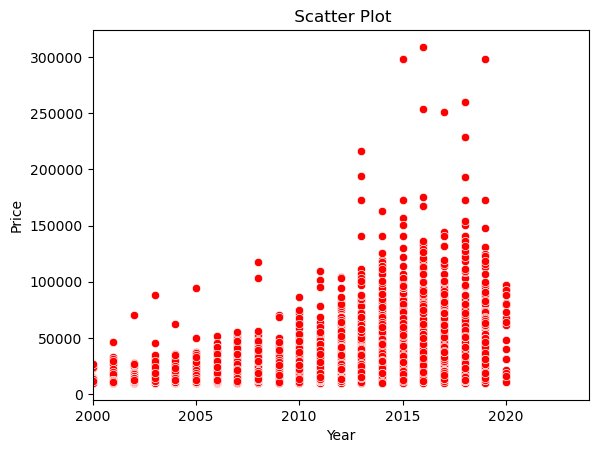

In [49]:
sns.scatterplot(x='Prod. year', y='Price', data=df_usedcar_train, color='red', marker='o')

# Add titles and labels
plt.title(' Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xlim(2000,2024)  # Adjust the range as needed
# Show plot
plt.show()

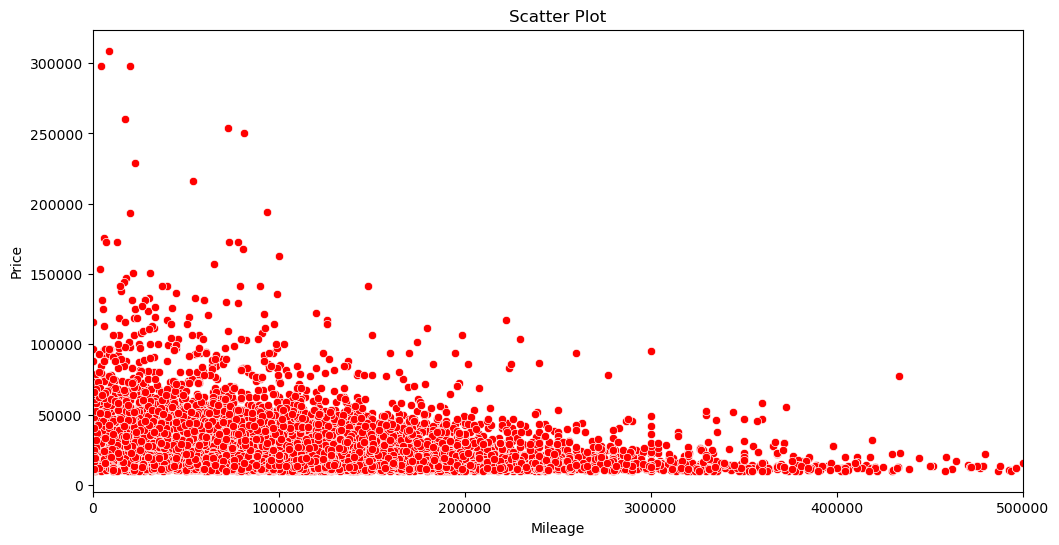

In [50]:
plt.figure(figsize=(12, 6)) 
sns.scatterplot(x = 'Mileage', y='Price', data=df_usedcar_train, color='red', marker='o')

# Add titles and labels
plt.title('Scatter Plot')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.xlim(0,500000)  # Adjust the range as needed
# Show plot
plt.show()

<Axes: >

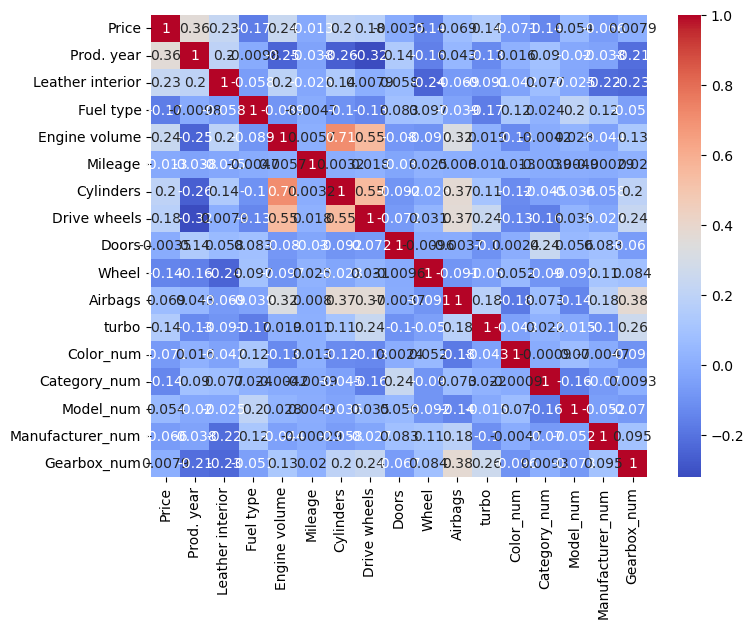

In [51]:
df_corr=df_usedcar_train.corr(numeric_only=True)

plt.figure(figsize=(8, 6))  # Set the figure size (width, height) in inches
sns.heatmap(df_corr, annot=True, cmap='coolwarm')  # Create the heatmap

In [52]:
msk = np.random.rand(len(df_usedcar_train))< 0.9

In [53]:
train = df_usedcar_train[msk]
test = df_usedcar_train[~msk]

In [54]:
# Initialize models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import numpy as np
import matplotlib.pyplot as plt

train_x = np.asanyarray(train[['Model_num', 'Prod. year', 'Leather interior',
                              'Engine volume','Mileage', 'Cylinders',
                               'Drive wheels','turbo','Gearbox_num']])
train_y = np.asanyarray(train[['Price']])

test_x = np.asanyarray(test[['Model_num', 'Prod. year', 'Leather interior',
                              'Engine volume','Mileage', 'Cylinders',
                               'Drive wheels','turbo','Gearbox_num']])
test_y = np.asanyarray(test[['Price']])

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Neural Network': MLPRegressor(max_iter=500)
}

# Fit and evaluate models
for name, model in models.items():
    model.fit(train_x,train_y)
    score = model.score(test_x, test_y)
    print(f"{name}: {score}")

Linear Regression: 0.32977019087179626
Decision Tree: 0.6229511742106566
Random Forest: 0.7958058447807708
Gradient Boosting: 0.6470199310476417
Support Vector Regression: -0.115446918107601
K-Nearest Neighbors: 0.04904574501466341
Neural Network: -2.100818618481656


Feature ranking:
1. Prod. year (0.2519987700664526)
2. Engine volume (0.19582818999521395)
3. Model_num (0.17035566911077324)
4. Mileage (0.1683994999824007)
5. turbo (0.08682256803074084)
6. Cylinders (0.047917858993577506)
7. Gearbox_num (0.04039172688472862)
8. Drive wheels (0.023329412190578706)
9. Leather interior (0.014956304745533866)


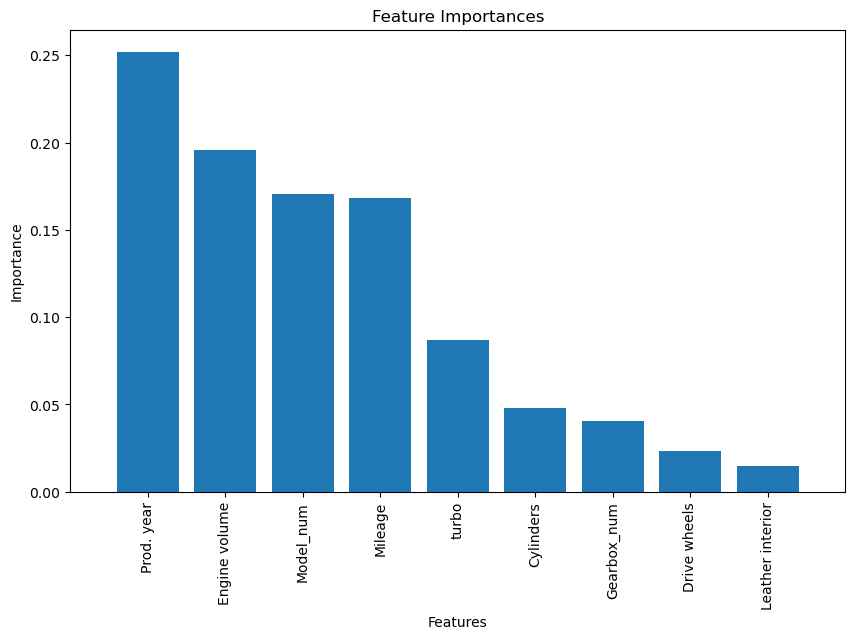

The R2 is:  79.68
The MSE is:  77588707.83866695
The MAE is:  4766.567227263559


In [55]:
regr = RandomForestRegressor()
regr.fit(train_x,train_y)
feature_names = ['Model_num', 'Prod. year', 'Leather interior',
                              'Engine volume','Mileage', 'Cylinders',
                               'Drive wheels','turbo','Gearbox_num']
# Get feature importances
importances = regr.feature_importances_

# Sort the feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

# Print the feature rankings
print("Feature ranking:")
for f in range(train_x.shape[1]):
    print(f"{f + 1}. {feature_names[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(train_x.shape[1]), importances[indices], align="center")
plt.xticks(range(train_x.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, train_x.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

test_y_ = regr.predict(test_x)

print('The R2 is: ', round(((r2_score(test_y,test_y_))*100),2))
#print('The MSE is: ', round((((np.mean((test_y_-test_y)**2)))*100),2))
print('The MSE is: ',  mean_squared_error(test_y,test_y_)  )
#print('The MAE is: ', round((((np.mean(np.absolute(test_y_-test_y))))*100),2))
print('The MAE is: ', mean_absolute_error(test_y,test_y_))

In [56]:
from sklearn.neural_network import MLPRegressor
import pickle

model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
model.fit(train_x, train_y)

model_filename = 'car_price_model3.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

In [57]:
def predict_car_price(model_num, prod_year,leather_interior,engine_volume,mileage, cylinder,drive_wheel,turbo,gearbox_num):
     # Map model names and leather interior to numerical values
    model_mapping = {'Prius': 1154, 'Sonata': 1334, 'Camry': 435, 'Elantra': 633}
    leather_mapping = {'Yes': 1, 'No': 0}
    drive_wheel_mapping = {'Front': 0, 'Rear': 1, '4x4': 2}
    turbo_mapping = {'Yes': 1, 'No': 0}
    gearbox_type_mapping = {'Automatic':0, 'Tiptronic':1, 'Variator':2, 'Manual':3}
    #if model_num == 'Prius':
     #   model_num=1154;

    #if leather_interior == 'Yes':
    #    leather_interior=1;
    #elif leather_interior == 'No':
    #    leather_interior=0;

    # Handle potential missing or invalid values
    model_num = model_mapping.get(model_num, 0)  # Default to 0 if not found
    leather_interior = leather_mapping.get(leather_interior, 0)  # Default to 0 if not found
    drive_wheel = drive_wheel_mapping.get(drive_wheel, 0)
    turbo = turbo_mapping.get(turbo, 0)
    gearbox_num = gearbox_type_mapping.get(gearbox_num, 0)

    input_data = pd.DataFrame({'Model_num': [model_num], 'Prod. year': [prod_year], 'Leather interior': [leather_interior],
                              'Engine volume': [engine_volume],'Mileage': [mileage], 'Cylinders': [cylinder],
                               'Drive wheels': [drive_wheel],'turbo': [turbo],'Gearbox_num':[gearbox_num]})
    
    predicted_price = regr.predict(input_data)[0]
    return f"Predicted car price: ${predicted_price:.2f}"

model_options = ['Prius', 'Sonata', 'Camry', 'Elantra']
leather_options = ['Yes', 'No']
drive_wheel_options = ['Front', 'Rear', '4x4']
turbo_options = ['Yes', 'No']
gearbox_type_options = ['Automatic', 'Tiptronic', 'Variator', 'Manual']

iface = gr.Interface(
    fn=predict_car_price,
    inputs=[
        gr.Dropdown(choices=model_options, label="Select Model"),
        gr.Number(minimum=1800, maximum=2024,step=10,value = 2000,label="Production Year"),
        gr.Dropdown(choices=leather_options, label="Leather Interior: (Yes/No)"),
        gr.Slider(minimum=0, maximum=5, step=0.1, value = 0.5,label="Engine Volume (cc)"),
        gr.Number(step=100,value = 1000,label="Mileage(km)"),
        gr.Slider(minimum=0, maximum=10, step=1, value = 1,label="Cylinder: "),
        gr.Dropdown(choices=drive_wheel_options, label="Drive Wheel: "),
        gr.Dropdown(choices=turbo_options, label="Turbo: (Yes/No)"),
        gr.Dropdown(choices=gearbox_type_options, label="Gearbox Type: "),
    ],
    outputs="text",
    title = 'Used Car Price Prediction'
)

iface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://c01a211aa7f85788e1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
